# Описание проекта

<br>Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
<br>Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
<br>Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
<br>Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
<br>Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
<br>А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
<br>1) выделить целевые группы клиентов;
<br>2) предложить меры по снижению оттока;
<br>3) определить другие особенности взаимодействия с клиентами.

## Загрузите данные

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 
<br>Набор данных включает следующие поля:
<br>**'Churn'** — факт оттока в текущем месяце;
    <br>Текущие поля в датасете:
        <br>Данные клиента за предыдущий до проверки факта оттока месяц:
<br>**'gender'** — пол;
<br>**'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
<br>**'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
<br>**Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
<br>**'Phone'** — наличие контактного телефона;
<br>**'Age'** — возраст;
<br>**'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).
<br>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
<br>**'Contract_period'** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
<br>**'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
<br>**'Group_visits'** — факт посещения групповых занятий;
<br>**'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
<br>**'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
<br>**'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('/datasets/gym_churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [3]:
def isnull_percent(data, text):
    print ('Доля пропущенных значений '+text+':')
    print ((data.isnull().sum() / data.shape[0]).apply('{:.2%}'.format))
isnull_percent(df, 'gym_churn')

Доля пропущенных значений gym_churn:
gender                               0.00%
Near_Location                        0.00%
Partner                              0.00%
Promo_friends                        0.00%
Phone                                0.00%
Contract_period                      0.00%
Group_visits                         0.00%
Age                                  0.00%
Avg_additional_charges_total         0.00%
Month_to_end_contract                0.00%
Lifetime                             0.00%
Avg_class_frequency_total            0.00%
Avg_class_frequency_current_month    0.00%
Churn                                0.00%
dtype: object


In [4]:
print ('Количество дубликатов:', len(df) - len(df.drop_duplicates()))

Количество дубликатов: 0


**Вывод по шагу 1:** Типы данных в порядке кроме столбца Month_to_end_contract, данный столбецц должен быть целочисленным, проверили на дубликаты и пропуски. В таблице пропусков и дубликатов нет

## Проведите исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [5]:
df.columns = df.columns.str.lower()
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрев информацию о столбцах, можно сделать следующие выводы:
- Данные по полу посетителей имеют обозначения 0 и 1, где 0 - мужчины, 1 - женщины. В нашей выборке их равное количество, так как среднее значение практически равно 0,5. 
- Столбец с местом проживания также имеет разделение 1- живут или работают рядом, 0 - живут в отдалености он него. Смотря среднее число 0,85 можно сказать что больше всего жителей которые живут рядом. Первый квартиль равен 1.
- Столбец с посетителями по партнерской программе, смотря на среднее число можно сказать что в клубе практически равное количество посетителей по партнерской программе, так как средняя близка к 0,5
- По данным из столбца где отообржается пришел ли посетитель по программе привиди друга видно что средняя равно 0,3 а это означает что большинство посетелей пришли сами.
- Наличие телефоного номера так же обозначается 0 или 1. По данным из столбца можно заметить средняя равна 0,9, что означает что практически у всех есть номера.
- Данные по столбцу с возрастом говорят нам о том что средний возвраст посетителя равен 29 года.  минимальный 18 а максимальный 41. 
- По данным столбца о первом обращении клиента. Среднее время с момента первого обращения 3 месяца. Максимальное 31 месяц
- В столбце с действующими абонементами есть искожение. много пользователей у кого абонемент на 1 месяц. А среднее число срока действия абонемента 4 месяца.
- столбец с дапой окночания абонемента показывает следующую информацию, что среднее кличество месяцев до окончания это 4 месяца, но у больше половины людей до окончания абонемента остался месяц.
- Про посещение груповвых занятий можно сказать следующее, занятия посещают меньше половины постителейй
- В столбце со средней частотой посещением в неделю видно, что в среднем посетитель посещает с частотой 2 раза в неделю.  максимальное количсетво посещений 6 раз.
- Среднее значение посещений за прошлый месяц так же равно 2. стандартное отклонение не выское
- Выручка от прочих услуг фитнес-центра составила от 0,15 до 552,6 ден.ед. В среднем это значение составляет около 147 ден.ед., медиана равна 136 ден.ед. Разброс данных очень большой.
- Факт оттока очень маленький, так как среднее значение 0,2 

### <br>Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [7]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Проанализировав средние значения двух групп можно сказать следующее:
- Остаются заниматься посетители живут рядом с фитнесом, половина из них пришли по партнерской программе. Практически у всех указаны телефоны. Средний переиод абонемента это 5-6 месяцев. Почти половина посещает групповые занятия, средний возраст 29 лет. Средняя сумарная выручка равна 158 ден.ед. посещение в сренем за весь период и за прошлый месяц в среднем 2 раза в неделю.
- Посетители которые ушли, проживают в основном рядом с фитнесом, в основном это люди которые пришли не партнерской программе и не через промо. Соответственно мог повлиять фактор, что им мало кто рассказывал о фитнесе и его плюсах. Средний время действия абонемента 2 месяц, они не посещали групповые занятия практически, средний возраст таких посететтелей 27 лет. Средняя суммарная выручка 115 ден.ед. и среднее количество посещений в неделю у этой группы примерно 1 раз.

### <br>Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);


In [8]:
churn_df = df.query('churn == 1')
loyal_df = df.query('churn == 0')

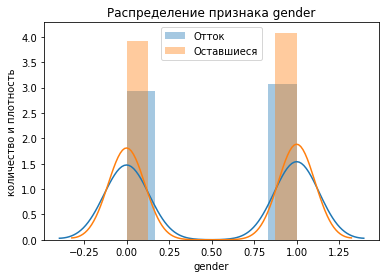

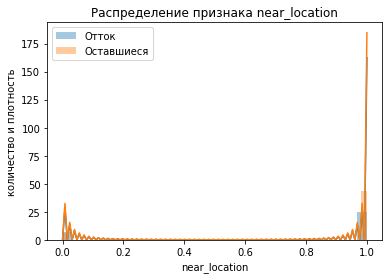

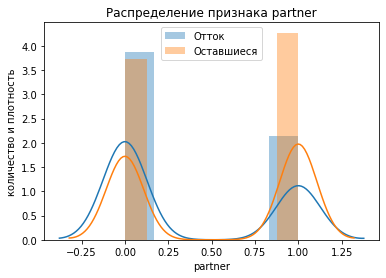

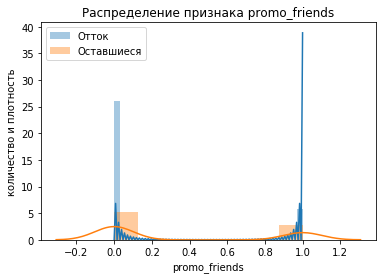

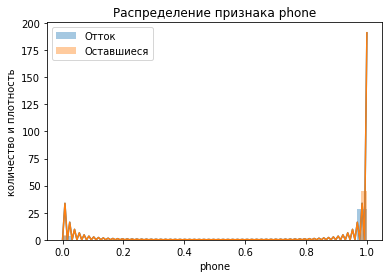

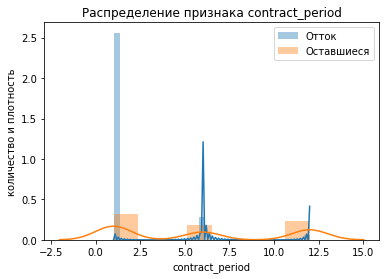

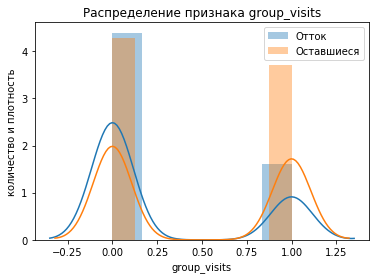

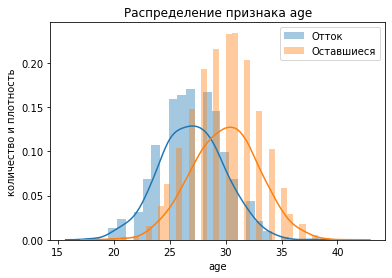

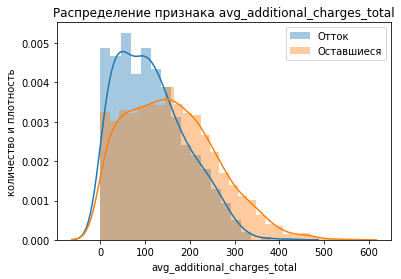

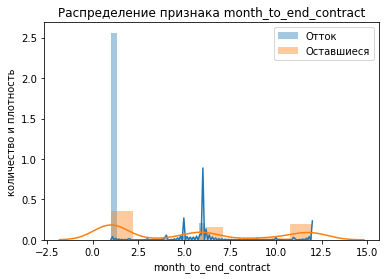

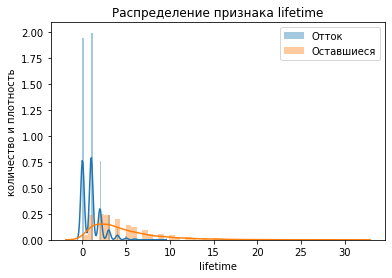

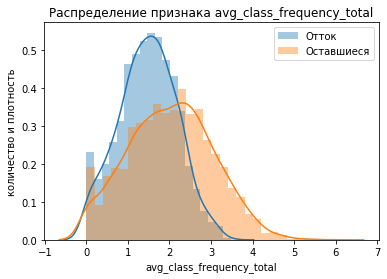

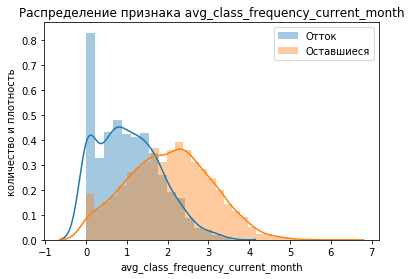

In [9]:
for col in df.drop('churn', axis = 1).columns:
    plt.title("Распределение признака "+col)
    plt.xlabel(col)
    plt.ylabel("количество и плотность")
    sns.distplot(churn_df[col], label='churn')
    sns.distplot(loyal_df[col], label='loyal')
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

- На графиках распредления признаков по полу, наличию телефона и удалености от фитнеса примерные одинаковые показатели.
- На графике распределения по партнерской прорамме видно что больше посетителей которые остались и они пользуются партнерской выгодой.
- По акции привиди друга видно, что в группе оттока и оставшихся много тех не пользовался данной акцией,и в обеих группах мало кто воспользовался ей.
- Большая часть посетителей которые имели абонемент на 1 месяц это те кто ушли. а в группе лояльных клиентов большинство у кого на месяц и год абонемент.
- На групповые занятия ходят больше те посетители которые остались.
- По распределнию с возрастом видно что боее возрастные посетители у оставшихся пользователей
- Больше всего ушедших посетителей тратили деньги на допуслуги 
- У ушедших посетителей оставлся месяц до окончания абонемента и таких посетителей больше всего
- Распределение для ушедших клиентов оно сильно смещено влево, практически не имея значения в более высоких значениях, а для лояльных клиентов принимает более высокие значения.
- Распределения по признаку посещений вообще и за прошедший месяц практически одинаковые. Группа оттока в обоих случаях ходила мало. А те кто остались ходят более чаще

### <br>Постройте матрицу корреляций и отобразите её.

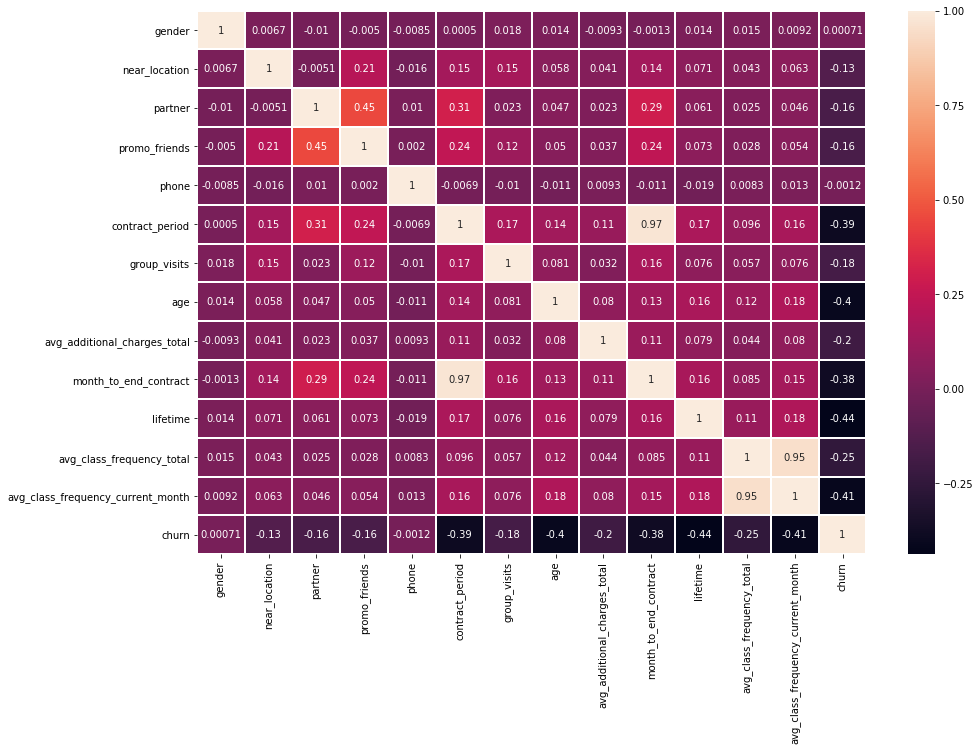

In [10]:
fig = plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, linewidths=1)
plt.show()

**Вывод по шагу 2** 
- Данные по полу посетителей имеют обозначения 0 и 1, где 0 - мужчины, 1 - женщины. В нашей выборке их равное количество, так как среднее значение практически равно 0,5. 
- Столбец с местом проживания также имеет разделение 1- живут или работают рядом, 0 - живут в отдалености он него. Смотря среднее число 0,85 можно сказать что больше всего жителей которые живут рядом. Первый квартиль равен 1.
- Столбец с посетителями по партнерской программе, смотря на среднее число можно сказать что в клубе практически равное количество посетителей по партнерской программе, так как средняя близка к 0,5
- По данным из столбца где отообржается пришел ли посетитель по программе привиди друга видно что средняя равно 0,3 а это означает что большинство посетелей пришли сами.
- Наличие телефоного номера так же обозначается 0 или 1. По данным из столбца можно заметить средняя равна 0,9, что означает что практически у всех есть номера.
- Данные по столбцу с возрастом говорят нам о том что средний возвраст посетителя равен 29 года.  минимальный 18 а максимальный 41. 
- По данным столбца о первом обращении клиента. Среднее время с момента первого обращения 3 месяца. Максимальное 31 месяц
- В столбце с действующими абонементами есть искожение. много пользователей у кого абонемент на 1 месяц. А среднее число срока действия абонемента 4 месяца.
- столбец с дапой окночания абонемента показывает следующую информацию, что среднее кличество месяцев до окончания это 4 месяца, но у больше половины людей до окончания абонемента остался месяц.
- Про посещение груповвых занятий можно сказать следующее, занятия посещают меньше половины постителейй
- В столбце со средней частотой посещением в неделю видно, что в среднем посетитель посещает с частотой 2 раза в неделю.  максимальное количсетво посещений 6 раз.
- Среднее значение посещений за прошлый месяц так же равно 2. стандартное отклонение не выское
- Выручка от прочих услуг фитнес-центра составила от 0,15 до 552,6 ден.ед. В среднем это значение составляет около 147 ден.ед., медиана равна 136 ден.ед. Разброс данных очень большой.
- Факт оттока очень маленький, так как среднее значение 0,2 
<br>
<br>
- Остаются заниматься посетители живут рядом с фитнесом, половина из них прили по партнерской программе. Практически у всех указаны телефоны. Средний переиод абонемента это 5-6 месяцев. Почти половина посещает групповые занятия, средний возраст 29 лет. Средняя сумарная выручка равна 158 ден.ед. посещение в сренем за весь период и за прошлый месяц в среднем 2 раза в неделю.
- Посетители которые ушли, проживают в основном рядом с фитнесом, в основном это люди которые пришли не партнерской программе и не через промо. Соответственно мог повлиять фактор, что им мало кто рассказывал о фитнесе и его плюсах. Средний время действия абонемента 2 месяц, они не посещали групповые занятия практически, средний возраст таких посететтелей 27 лет. Средняя суммарная выручка 115 ден.ед. и среднее количество посещений в неделю у этой группы примерно 1 раз.
<br>
<br>
- На графиках распредления признаков по полу, наличию телефона и удалености от фитнеса примерные одинаковые показатели.
- На графике распределения по партнерской прорамме видно что больше посетителей которые остались и они пользуются партнерской выгодой.
- По акции привиди друга видно, что в группе оттока и оставшихся много тех не пользовался данной акцией,и в обеих группах мало кто воспользовался ей.
- Большая часть посетителей которые имели абонемент на 1 месяц это те кто ушли. а в группе лояльных клиентов большинство у кого на месяц и год абонемент.
- На групповые занятия ходят больше те посетители которые остались.
- По распределнию с возрастом видно что боее возрастные посетители у оставшихся пользователей
- Больше всего ушедших посетителей тратили деньги на допуслуги 
- У ушедших посетителей оставлся месяц до окончания абонемента и таких посетителей больше всего
- Распределение для ушедших клиентов оно сильно смещено влево, практически не имея значения в более высоких значениях, а для лояльных клиентов принимает более высокие значения.
- Распределения по признаку посещений вообще и за прошедший месяц практически одинаковые. Группа оттока в обоих случаях ходила мало. А те кто остались ходят более чаще

## Постройте модель прогнозирования оттока клиентов

### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [11]:
# Разделим данные на признаки (матрица x) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# разделите модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cтандартизируем данные
scaler = StandardScaler()
scaler.fit(X_train)
x_train_st = scaler.transform(X_train)
x_test_st = scaler.transform(X_test)

### Обучите модель на train-выборке двумя способами:

#### логистической регрессией,

In [12]:
model = LogisticRegression(random_state=0)
model.fit(x_train_st, y_train)
predictions = model.predict(x_test_st)
probabilities = model.predict_proba(x_test_st)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### - случайным лесом.

In [13]:
for_model = RandomForestClassifier(random_state=0)
for_model.fit(x_train_st, y_train)
for_predictions = for_model.predict(x_test_st)
for_probabilities = for_model.predict_proba(x_test_st)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [14]:
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities)))


Метрики для логистической регрессии
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84
ROC_AUC: 0.97



In [15]:
print('Метрики для случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, for_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, for_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, for_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, for_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, for_probabilities)))


Метрики для случайного леса
Accuracy: 0.91
Precision: 0.83
Recall: 0.78
F1: 0.80
ROC_AUC: 0.95


**Вывод по шагу 3:**
Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии. Таким образом, модель логистической регрессии показала себя лучше.

## Сделайте кластеризацию клиентов

### Стандартизируйте данные.

In [16]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. 

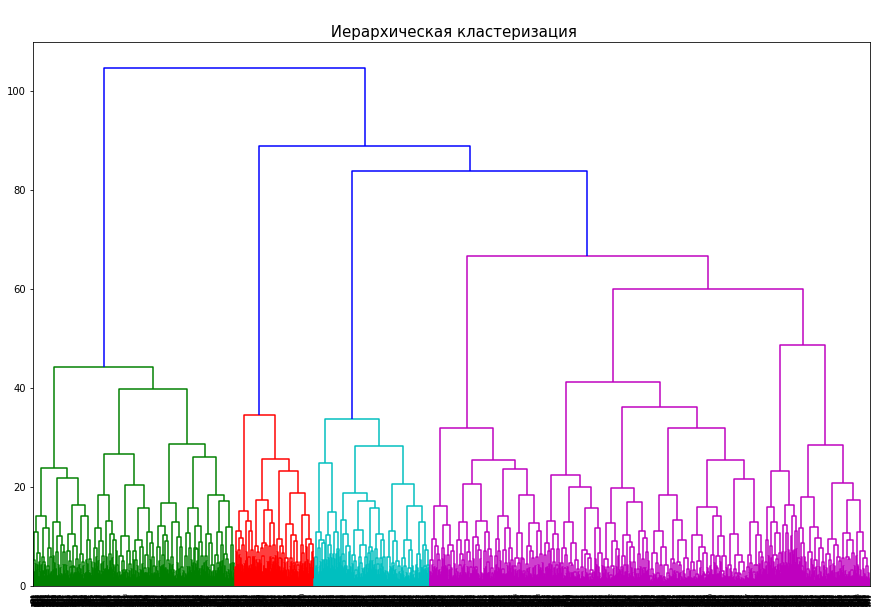

In [17]:
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('\n Иерархическая кластеризация', fontsize=15)
plt.show()

Можно выделить 4 кластера, последний кластер большой. Будем использовать 5 кластеров

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов.

In [18]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(x_sc)
df['cluster_km'] = labels

### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [19]:
cluster_df=df.groupby('cluster_km').mean().reset_index()
cluster_df

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


- Кластер 0 - все бинарные показатели выше, чем у остальных
- Кластер 1 - выше всего отток и меньше все остальные параметры
- Кластер 2 - кластера отсутствуют номера телефонов
- Кластер 3 - самый низкий показатель оттока и самые высокие колличественные показатели

### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

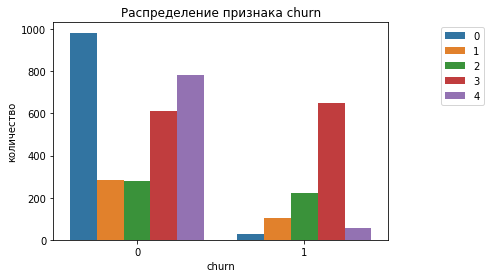

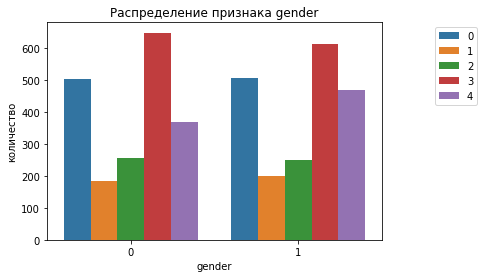

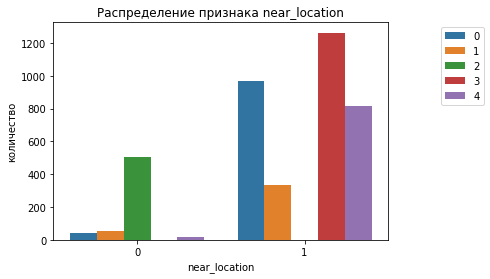

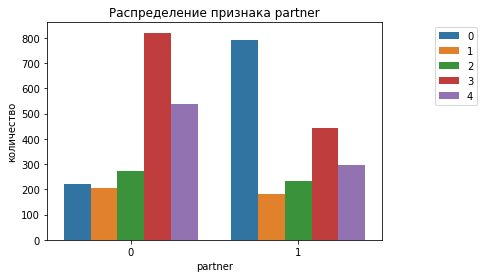

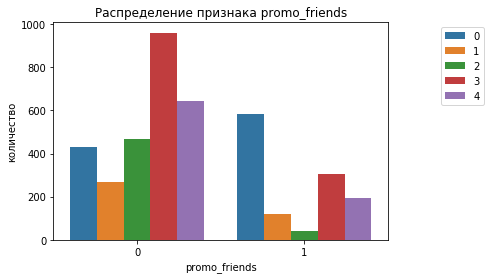

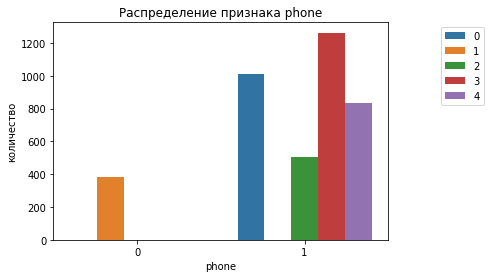

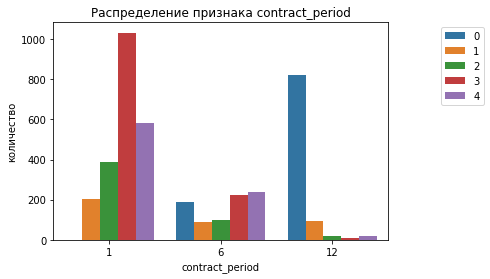

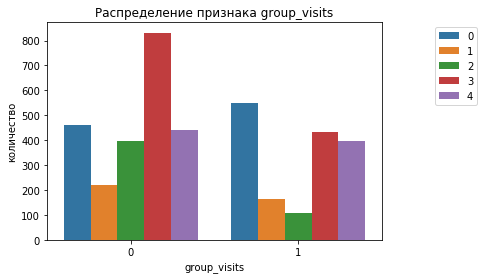

In [20]:
values = [ 'churn','gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']
fig, ax = plt.subplots()
for col in values:
    plt.title("Распределение признака "+col)
    sns.countplot(data=df, x=col, hue='cluster_km')
    plt.xlabel(col)
    plt.ylabel("количество")
    plt.legend(bbox_to_anchor=(1.3, 1))
    plt.show()

Будем строить графики для непрерывных данных

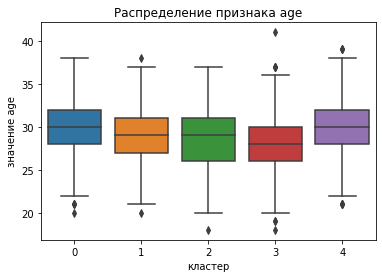

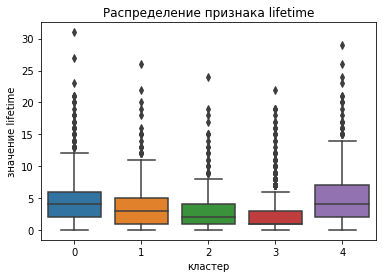

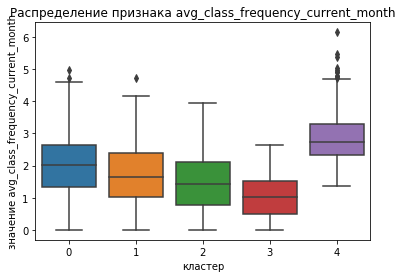

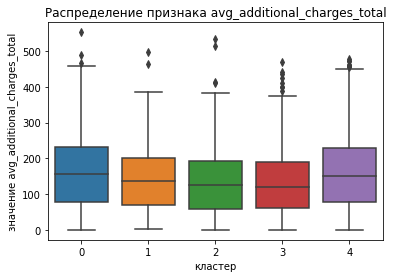

In [21]:
cont = ['age', 'lifetime', 'avg_class_frequency_current_month', 'avg_additional_charges_total']
fig, ax = plt.subplots()
for col in cont:
    plt.title("Распределение признака "+col)
    sns.boxplot(x='cluster_km', y=col, data=df)
    plt.xlabel('кластер')
    plt.ylabel('значение '+col)
    plt.show()

<br>**Кластер 0**
<br>В данном кластере больше все людей, которые ушли. Кластер по полу разбит поровну. По отдаленности от фитнеса в данном кластере значительно больше тех, кто находится рядом с ним. Партнерами клуба в данном кластере является большинство. Больше половины пришли по программе «Приведи друга». Все в кластере оставили номера телефонов. В данном кластере абонементы оформляли только на 6 и 12 месяцев. В основном на 12 месяцев. Чуть больше половины посетителей кластера посещали групповые занятия. Средний возраст кластера 30 лет. Длительный срок пользования от начала пользования услугами. Среднее посещение занятий 2 раза в неделю. Большой уровень оплаты доп услуг. <br>
<br>**Кластер 1**
<br>В два раза больше людей которые ушли, чем которые остались. Кластер по полу разбит поровну. По отдаленности от фитнеса в данном кластере больше тех, кто находится рядом с ним. Те, кто пришел по партнёрской программе в данном кластере равно количество, тех кто пришел без. По программе «Приведи друга» пришло очень мало людей. В данном кластере есть люди, которые не оставили номера телефонов. Половина посетителей оформляли абонемент на 1 месяц. Остальная половина практически поровну на 6 и 12 месяцев. Чуть больше половины посетителей кластера не посещали групповые занятия. Средний возраст кластера 29 лет. Длительный срок пользования от начала пользования услугами. Среднее посещение занятий 1,7 раза в неделю. Средний уровень оплаты доп услуг.<br>
<br>**Кластер 2**	
<br>Примерно равное количество оттока и оставшихся посетители. Кластер по полу разбит поровну. По отдаленности от фитнеса в данном кластере только те, кто находится далеко от него. Те, кто пришел по партнёрской программе в данном кластере практически равно количество, тех кто пришел без. Но немного больше тех пришел не по партнерке. Практически нет посетителей по программе «Приведи друга». Все в кластере оставили номера телефонов. Большая посетителей оформляли абонемент на 1 месяц. Остальные на 6 месяцев, и очень мало на 12. Чуть больше половины посетителей кластера нее посещали групповые занятия. Средний возраст кластера 29 лет. Короткий срок пользования от начала пользования услугами. Среднее посещение занятий 2 раза в неделю. 1,5 Низкий уровень оплаты доп услуг.<br>
<br>**Кластер 3**
<br>Примерно равное количество оттока и оставшихся посетители, но в данном кластере количество больше, чем во кластере 2. Кластер по полу разбит практически поровну, мужчин в данном кластере больше. По отдаленности от фитнеса в данном кластере только те, кто находится рядом с ним. В данном кластере много посетителей кто пришел бе партнерской программы. Большинство посетителей пришли сами, без промо. Все в кластере оставили номера телефонов. Большая посетителей оформляли абонемент на 1 месяц. Остальные на 6 месяцев, и очень мало на 12. Чуть больше половины посетителей кластера посещали групповые занятия. Средний возраст кластера 27 лет. Короткий срок пользования от начала пользования услугами. Среднее посещение занятий 1 раз в неделю.  Низкий уровень оплаты доп услуг.<br>
<br>**Кластер 4**	
<br>В данном кластере больше все людей, которые ушли, но их количество меньше чем в кластере 0. Кластер по полу разбит практически поровну, женщин в данном кластере больше. По отдаленности от фитнеса в данном кластере в основном те, кто находится рядом с ним. В данном кластере много посетителей кто пришел бе партнерской программы. Но количество таких посетителей меньше чем в кластере 3. Большинство посетителей пришли сами, без промо. Все в кластере оставили номера телефонов. Большая посетителей оформляли абонемент на 1 месяц. Остальные на 6 месяцев, и очень мало на 12. Чуть больше половины посетителей кластера не посещали групповые занятия. Средний возраст кластера 30 лет. Длительный срок пользования от начала пользования услугами. Среднее посещение занятий 2,8 раза в неделю. Большой уровень оплаты доп услуг. 


### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [22]:
(df
     .groupby('cluster_km')['churn']
     .mean()
     .reset_index()
     .sort_values(by='churn', ascending=False)
     .reset_index(drop=True))

,cluster_km,churn
0,3,0.514263
1,2,0.443564
2,1,0.267532
3,4,0.068100
4,0,0.027695


Самыми надежнвми кластерами будем считать 0 и 4. Там практически нет доли оттока. Когда в 3 кластере практически 50%

**ОБЩИЙ ВЫВОД и РЕКОМЕНДАЦИИ**

- Необходимо больше работать с кластерами 0 и 4. 
- Свою стратегию необходимо направить на жителей рядом с фитнесом.
- Сделать упор на акцию "Приведи друга", чтобы посетители больше советовали и приводили с собой друзей.
- Так же развивать свою партнерскую программу. 
- Сделать упор на людей чей возраст 30 лет. 
- Но так же наблюдается не большое количество посещений. Скороее всего это из-за того что все приходят после работы вечером кога и все, из-за этого може не хватать тренажеров и т.д.
- Чем люди старше тем они больше тратят денег на доп услуги.
- Делать условия для покупки абонементов на 12 месяцев, так как с такими абонементами отток меньше.
- Разработать прорамму для удержания клиентов у которых абонемент на 1 месяц, возможно скидки на проление и прочее.